# Super Store Sales Analysis 


### KIMPREET KAUR WALIA
### SPARKS FOUNDATION INTERNSHIP - MARCH'23

In [66]:
#Import libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Data Exploration

In [2]:
#Read the data in CSV format
superstore_df=pd.read_csv("SampleSuperstore.csv")

#Preview first 5 rows
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
 #Preview last 5 rows
superstore_df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
#Shape of data set
superstore_df.shape

(9994, 13)

In [3]:
#Summarised information of data set
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Finding Missing Values

In [12]:
#find missing(null) or duplicate values
superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
#duplicate data
superstore_df.duplicated().sum()

17

In [4]:
#show the duplicate rows
superstore_df[superstore_df.duplicated(keep='last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [5]:
#Drop the duplicated rows
superstore_df.drop_duplicates(inplace= True)

In [6]:
superstore_df.shape

(9977, 13)

In [7]:
#statistical discription
superstore_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [61]:
#unique categories in data frame
print(superstore_df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


## Exploratory Data Analysis

In [50]:
#worst (best) Selling and Least (most) Profitable Category 
category=pd.DataFrame(superstore_df.groupby(['Category'])[['Sales', 'Discount','Profit', 'Quantity']].sum())
category

,Sales,Discount,Profit,Quantity
Category,,,,
Furniture,741306.3133,368.59,18421.8137,8020
Office Supplies,718735.2440,946.20,122364.6608,22861
Technology,836154.0330,244.40,145454.9481,6939


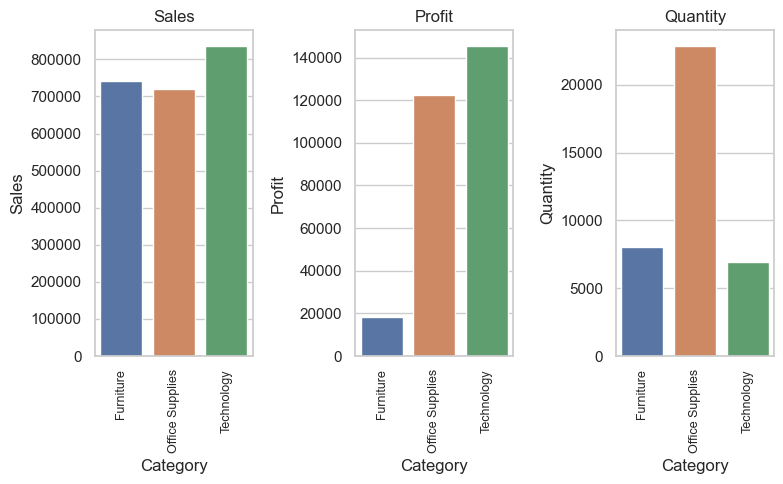

In [52]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category.index, y = category.Sales, ax=axis[0])
cat2 = sns.barplot(x = category.index, y = category.Profit, ax=axis[1])
cat3 = sns.barplot(x = category.index, y = category.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

### Furniture, Office Supplies and Technology make similar amount of sales. Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years. Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too. Office Supplies sells the most in terms of quantity as it is relatively cheap product.

In [64]:
print(superstore_df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [68]:
no_of_subcategory=superstore_df['Sub-Category'].nunique()
no_of_subcategory

17

In [54]:
# the Best Selling and Most Profitable Sub-Category
subcategory=pd.DataFrame(superstore_df.groupby(['Sub-Category'])[['Sales', 'Profit','Quantity']].sum())
subcategory

# Sort by descending order according to sales
subcategory_sales = pd.DataFrame(subcategory.sort_values('Sales', ascending = False))
subcategory_sales

,Sales,Profit,Quantity
Sub-Category,,,
Phones,330007.0540,44515.7306,3289
Chairs,327777.7610,26567.1278,2351
Storage,223843.6080,21278.8264,3158
Tables,206965.5320,-17725.4811,1241
Binders,203409.1690,30228.0003,5971
Machines,189238.6310,3384.7569,440
Accessories,167380.3180,41936.6357,2976
Copiers,149528.0300,55617.8249,234
Bookcases,114879.9963,-3472.5560,868


In [55]:
# Sort by descending order according to profit
subcategory_profit = pd.DataFrame(subcategory.sort_values('Profit', ascending = False))
subcategory_profit

,Sales,Profit,Quantity
Sub-Category,,,
Copiers,149528.0300,55617.8249,234
Phones,330007.0540,44515.7306,3289
Accessories,167380.3180,41936.6357,2976
Paper,78224.1420,33944.2395,5144
Binders,203409.1690,30228.0003,5971
Chairs,327777.7610,26567.1278,2351
Storage,223843.6080,21278.8264,3158
Appliances,107532.1610,18138.0054,1729
Furnishings,91683.0240,13052.7230,3560


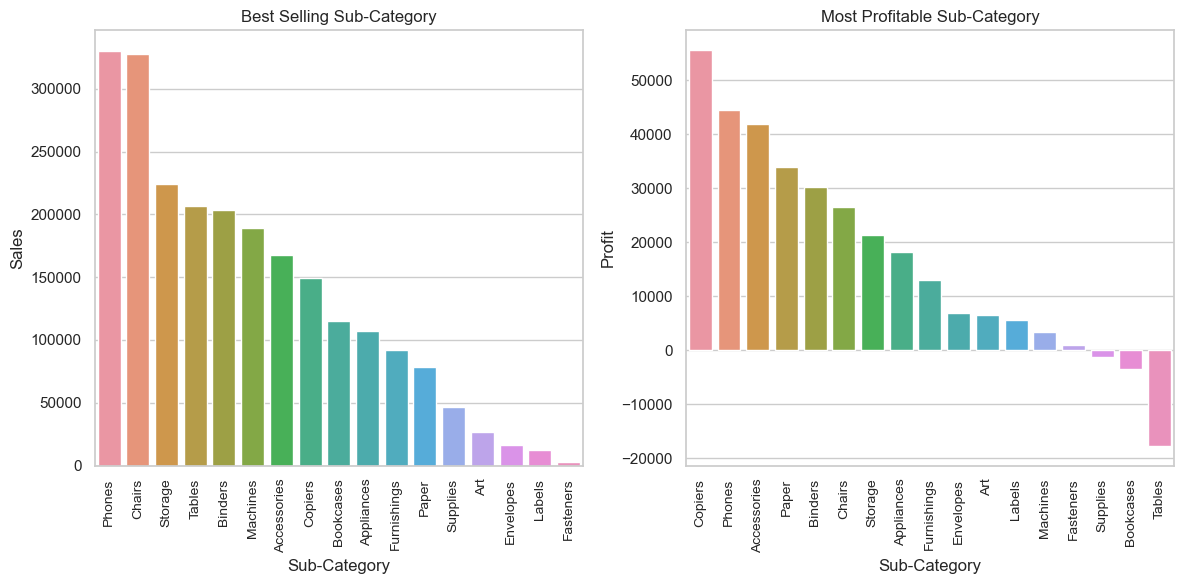

In [57]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcategory_sales, x = subcategory_sales.index, y = subcategory_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcategory_profit, x = subcategory_profit.index, y = subcategory_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

### Phones and Chairs are Top 2 best selling sub-category. Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

In [59]:
#Top Selling Sub-Category
subcategory_quantity = pd.DataFrame(superstore_df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcategory_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


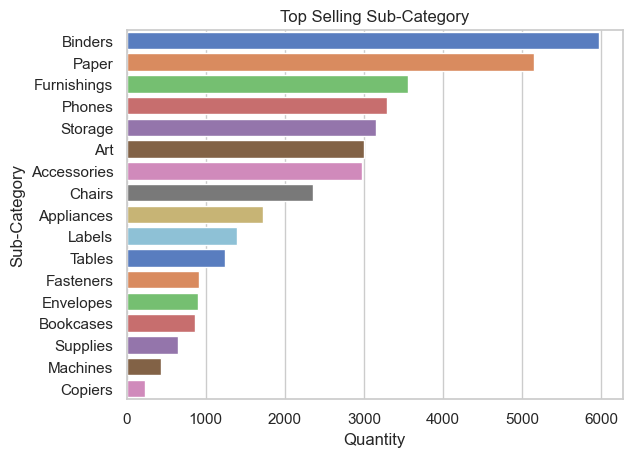

In [60]:
#Plot Bar Plot
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcategory_quantity, y = subcategory_quantity.index, x = subcategory_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()


### Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

In [73]:
#Customer Segment is Most Profitable
superstore_df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [63]:
segment_analysis = pd.DataFrame(superstore_df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


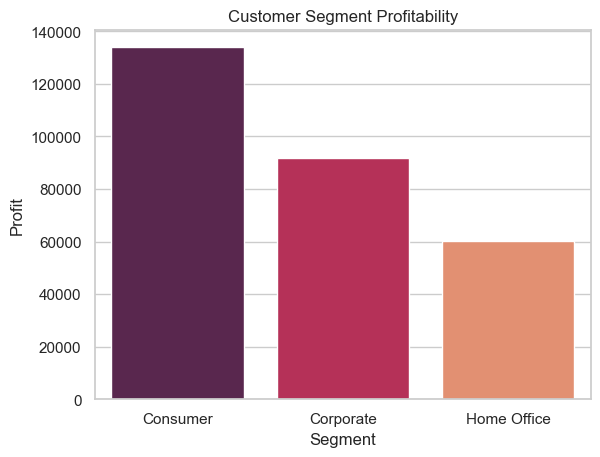

In [62]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

### Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

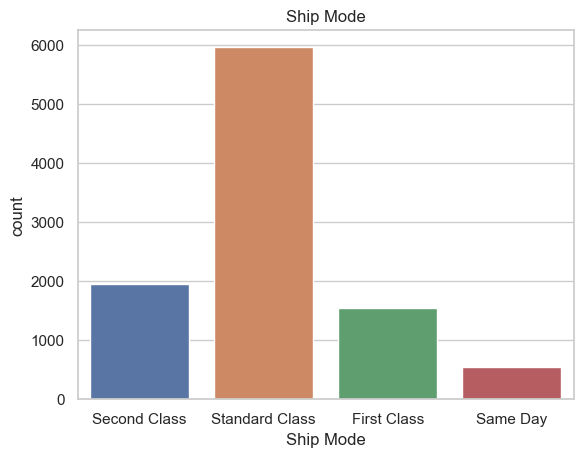

In [67]:
#Preferred Ship Mode
sns.set_theme(style="whitegrid")
sns.countplot(superstore_df['Ship Mode'])
plt.title("Ship Mode")
plt.show()

### By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

In [69]:
#Region is the Most Profitable
region_analysis = pd.DataFrame(superstore_df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


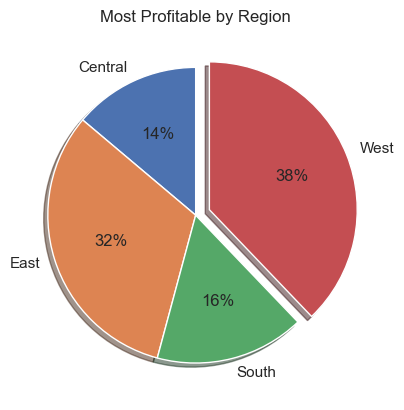

In [70]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

### East and West region are most profitable.

In [73]:
#cty has the Highest Number of Sales
city_sales = pd.DataFrame(superstore_df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [79]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


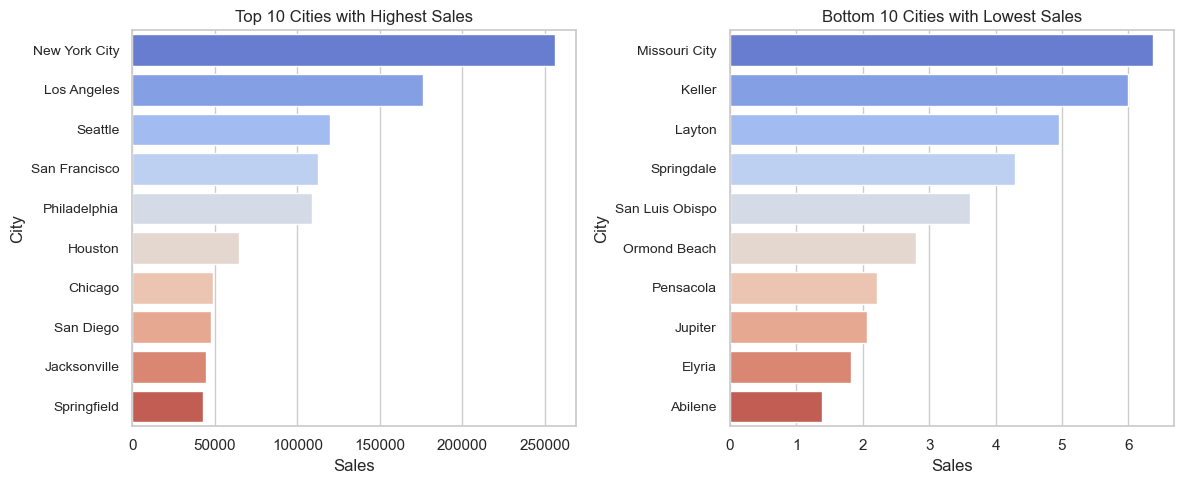

In [82]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(title="Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(title="Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

### There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.


# RECOMENDATIONS

### Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

### Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases. 

### For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price. Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest 

### Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.